In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('StudentsPerformance.csv')
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [5]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
data.shape

(1000, 8)

In [8]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.nunique() #returns unique value form each column

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [7]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [15]:
column = []
for x in data:
    if data[x].dtypes == 'object':
        column.append(x)

column

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in column:
    data[x]=le.fit_transform(data[x])

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)


Feature gender
mapping {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
Feature race/ethnicity
mapping {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4)}
Feature parental level of education
mapping {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5)}
Feature lunch
mapping {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
Feature test preparation course
mapping {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}


{'whiskers': [<matplotlib.lines.Line2D at 0x2e9b4c95d10>,
 'caps': [<matplotlib.lines.Line2D at 0x2e9b4c95f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e9b4c95bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2e9b4c96210>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e9b4c96350>],
 'means': []}

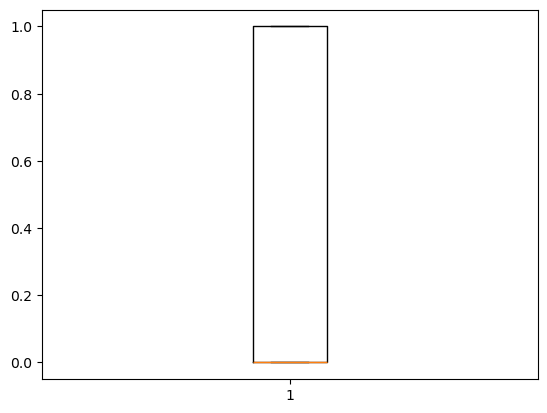

In [18]:
plt.boxplot(data["gender"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2e9b4d10e10>,
 'caps': [<matplotlib.lines.Line2D at 0x2e9b4d11090>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e9b4d10cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2e9b4d11310>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e9b4d11450>],
 'means': []}

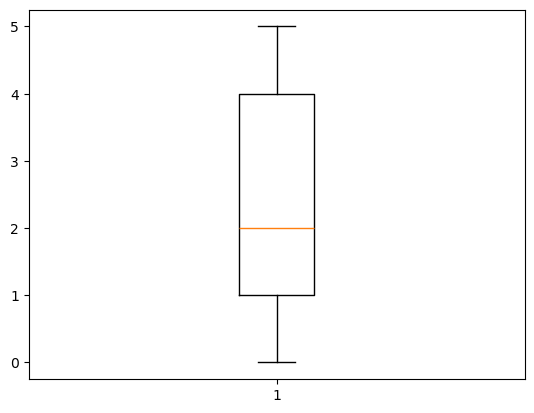

In [ ]:
plt.boxplot(data['parental level of education'])


{'whiskers': [<matplotlib.lines.Line2D at 0x2e9b4d88190>,
 'caps': [<matplotlib.lines.Line2D at 0x2e9b4d88410>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e9b4d88050>],
 'medians': [<matplotlib.lines.Line2D at 0x2e9b4d88690>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e9b4d887d0>],
 'means': []}

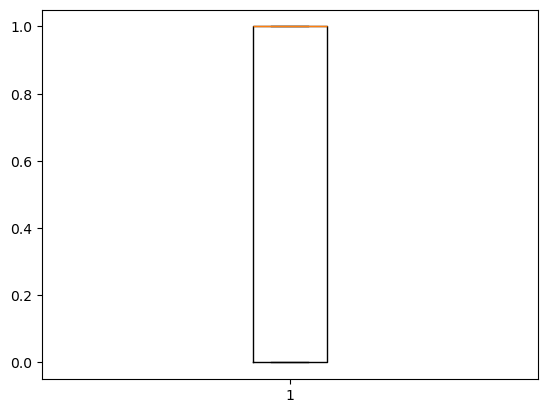

In [20]:
plt.boxplot(data['test preparation course'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2e9b4dc74d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2e9b4dc7750>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e9b4dc7390>],
 'medians': [<matplotlib.lines.Line2D at 0x2e9b4dc79d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e9b4dc7b10>],
 'means': []}

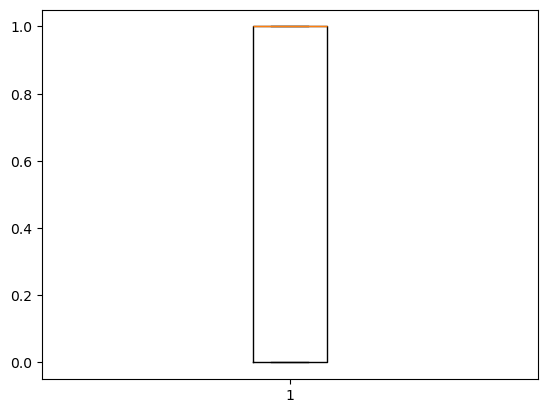

In [21]:
plt.boxplot(data['lunch'])

<Axes: >

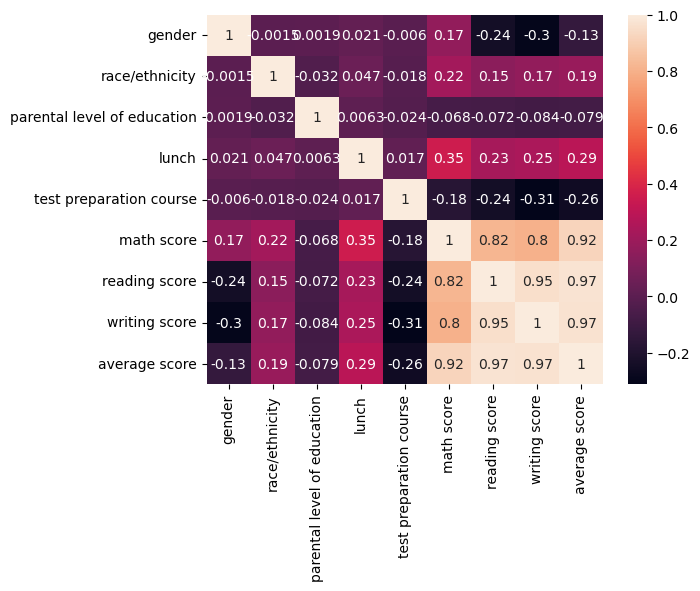

In [22]:
sns.heatmap(data.corr(), annot = True)

In [28]:
data['average score'] = data[['math score', 'reading score','writing score']].mean(axis=1)

x = data[['gender', 'parental level of education', 'lunch', 'test preparation course']]
y = data['math score']

In [29]:
x

,gender,parental level of education,lunch,test preparation course
0,0,1,1,1
1,0,4,1,0
2,0,3,1,1
3,1,0,0,1
4,1,4,1,1
...,...,...,...,...
995,0,3,1,0
996,1,2,0,1
997,0,2,0,0
998,0,4,1,0


In [30]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 4)
(200, 4)
(800,)
(200,)


In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

print('Beta values :', model.coef_)
print('Beta zero values : ', model.intercept_)

Beta values : [ 4.93131553 -0.70889188 11.11885537 -5.92520372]
Beta zero values :  62.13427648154846


In [35]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,0,1,1,1,1,72,72,74,72.666667
1,0,2,4,1,0,69,90,88,82.333333
2,0,1,3,1,1,90,95,93,92.666667
3,1,0,0,0,1,47,57,44,49.333333
4,1,2,4,1,1,76,78,75,76.333333


In [37]:
y_pred = model.predict(x_test)

y_pred

array([70.84145989, 71.83534808, 67.32792813, 64.49236059, 54.791289  ,
       61.14038829, 76.76666361, 65.91014436, 69.42367612, 58.58981706,
       67.32792813, 61.14038829, 62.13427648, 58.30482076, 57.59592887,
       75.34887984, 74.63998796, 73.25313185, 69.70867243, 72.54423996,
       71.55035178, 65.91014436, 69.70867243, 59.01371264, 69.42367612,
       68.71478424, 71.55035178, 76.76666361, 73.25313185, 57.59592887,
       58.30482076, 61.14038829, 69.42367612, 72.25924366, 69.42367612,
       58.30482076, 54.08239711, 77.47555549, 74.63998796, 74.63998796,
       71.55035178, 69.70867243, 68.71478424, 75.34887984, 59.72260453,
       64.49236059, 70.84145989, 70.41756431, 66.35670013, 59.72260453,
       72.25924366, 69.70867243, 76.76666361, 71.55035178, 55.50018088,
       58.30482076, 64.49236059, 69.70867243, 68.71478424, 59.72260453,
       59.29870894, 60.43149641, 65.91014436, 63.78346871, 64.49236059,
       59.29870894, 58.30482076, 63.52113259, 64.49236059, 68.71

In [38]:
x_test['actual'] = y_pred
x_test['predicted'] = y_pred

x_test

,gender,parental level of education,lunch,test preparation course,actual,predicted
946,1,2,1,1,70.841460,70.841460
220,0,2,1,0,71.835348,71.835348
945,0,0,1,1,67.327928,67.327928
672,0,4,1,1,64.492361,64.492361
548,0,2,0,1,54.791289,54.791289
...,...,...,...,...,...,...
765,0,2,1,1,65.910144,65.910144
343,1,0,1,0,78.184447,78.184447
760,0,2,0,1,54.791289,54.791289
370,1,4,1,1,69.423676,69.423676


In [39]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_test, y_pred)
rmse

13.25994908221904

In [40]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']